<a href="https://colab.research.google.com/github/FarshadAmiri/Learning-Machine_Learning/blob/master/K_means_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.spatial import distance
import time
import operator
mpl.rcParams['figure.figsize'] = (8,6)

# Generating a 2-D data

In [2]:
data1 = np.random.normal(0.65,0.2, size=(350,2))
data2_1 = np.random.normal(0.2,0.07, size=(370,1))
data2_2 = np.random.normal(0.8,0.07, size=(370,1))
data2 = np.hstack((data2_1,data2_2))
data3 = np.random.normal(loc=0.39, scale=0.09, size=(400,2))
data4_1 = np.random.normal(0.75,0.08, size=(500,1))
data4_2 = np.random.normal(0.25,0.06, size=(500,1))
data4 = np.hstack((data4_1,data4_2))
data5_1 = np.random.normal(0.7,0.09, size=(550,1))
data5_2 = np.random.normal(0.7,0.09, size=(550,1))
data5 = np.hstack((data5_1,data5_2))
data6 = np.random.normal(0.13,0.05, size=(200,2))
data = np.vstack((data1, data2, data3, data4, data5, data6 ))

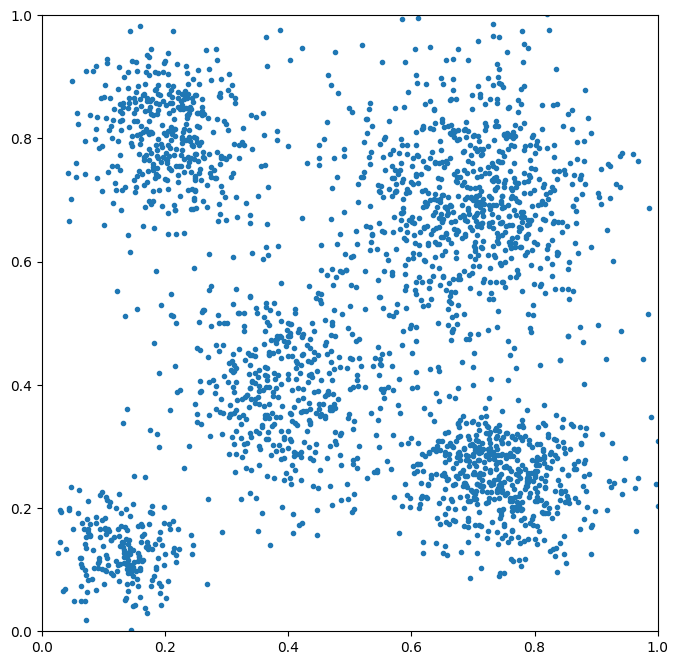

In [3]:
plt.figure(figsize=(8,8))
plt.xlim(0,1)
plt.ylim(0,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(data[:,0], data[:,1], marker='.')

# Declaring K-means functions

1.   K-means algorithm function
2.   Prediction on K-means function 
3.   smart K-means (it finds the best K)   



In [4]:
def kmeans(data, k, max_iteration=50, plot=True):
  
  # creating data dictionary (naming each sample)
  data_dict = {}
  for i in range(len(data)):
    a,b = data[i]
    data_dict['d' + str(i+1)] = (a,b)

  # Initializing the centroids
  centroids = np.random.rand(k,2)

  c_history = {}
  c_dict = {}
  for i in range(k):
    c_dict['c' + str(i+1)] = tuple(centroids[i])
    c_history['c' + str(i+1) + '_it0'] = tuple(centroids[i])

  plot_dict = {}
  silhouette = {}

  for iteration in range(max_iteration) :

    # Calculate each sample distance from each centroid
    dst_dict = {}
    for i in data_dict:
      dst_dict[i] = []
      for j in range(k):
        dst = distance.euclidean(data_dict[i], c_dict['c' + str(j+1)])
        dst_dict[i].append(dst)
        
    # Assigning each sample to its closest centroid
    assignments_dict = {}
    for i in dst_dict:
      assignments_dict[i] = 'c' + str(dst_dict[i].index(min(dst_dict[i])) + 1)

    members_dict = {}
    for i in assignments_dict:
      if assignments_dict[i] in members_dict:
        members_dict[assignments_dict[i]].append(i)
      else:
        members_dict[assignments_dict[i]] = [i]

    for i in members_dict:
      x = 0
      y = 0
      for j in members_dict[i]:
        x += data_dict[j][0]
        y += data_dict[j][1]
      x /= len(members_dict[i])
      y /= len(members_dict[i])
      c_dict[i] = (x,y)
      c_history[i.split('_')[0] + '_it' + str(iteration + 1)] = (x,y)

    for i in members_dict:
      plot_dict[str(i)+ '_x_' + str(iteration+1)] = []
      plot_dict[str(i)+ '_y_' + str(iteration+1)] = []
      for j in members_dict[i]:
        plot_dict[str(i)+ '_x_' + str(iteration+1)].append(data_dict[j][0])
        plot_dict[str(i)+ '_y_' + str(iteration+1)].append(data_dict[j][1])

    intra_dst = 0
    for i in members_dict:
      for j in members_dict[i]:
        intra_dst += distance.euclidean(data_dict[j],c_dict[i])
    intra_dst /= len(data_dict.keys())
    
    inter_dst = 0
    for i in c_dict:
      for j in c_dict:
        tmp = distance.euclidean(c_dict[i],c_dict[j])
        if tmp != 0:
          inter_dst += tmp
    inter_dst /= (2*len(c_dict))
    
    # print(f'iteration: {iteration}\ninter_dst: {inter_dst}\nintra_dst: {intra_dst}')

    silhouette[iteration + 1] = float(f'{(inter_dst - intra_dst) / max(inter_dst, intra_dst):.5f}')

    iterations = iteration + 1
    if iterations >10:
      if abs(silhouette[iteration + 1] - silhouette[iteration-2]) <= 0.00001:
         break

  if plot == True:
    for j in range(iterations):
      # c_xy = np.asarray(list(c_history['c' + str(c_n) + '_it' + str(j)] for c_n in range(1,k+1)))
      # plt.scatter(c_xy[:,0] ,c_xy[:,1], marker='D', color='r')
      for i in range(int(len(plot_dict.keys())/(2*iterations))):
        plt.scatter(x = plot_dict['c' + str(i+1) + '_x_' + str(j+1)], y = plot_dict['c' + str(i+1) + '_y_' + str(j+1)], marker='.')
        plt.title(f'Iteration No. {j+1}\nSilhouette Score = {silhouette[j + 1]}')
      c_xy = np.asarray(list(c_history['c' + str(c_n) + '_it' + str(j)] for c_n in range(1,k+1)))
      plt.scatter(c_xy[:,0] ,c_xy[:,1], marker='D', color='k')
      for c_n in range(0,k):
        plt.text(c_xy[c_n,0]+0.03, c_xy[c_n,1]+0.01, f'C{c_n+1}',fontsize=11, fontweight='bold') 
      if j == iterations - 1:
        break
      else:
        plt.pause(0.5)
  centroids = c_dict
  silhouette_score = silhouette[iterations]
  return silhouette_score, centroids

### Prediction function
Declaring a prediction function for our K-means

In [5]:
def predict_kmeans(data_point, c_dict):
  prediction_dict = {}
  for c in c_dict:
    c_dist = distance.euclidean(c_dict[c], data_point)
    prediction_dict[c] = c_dist
    print('Distance from ' + c + ' is ' + f'{c_dist:.3f}')
  best_centroid = min(prediction_dict.items(), key=operator.itemgetter(1))[0]
  print('--------------------')
  print('Best centroid seems to be',best_centroid, f'({c_dict[best_centroid][0]:.3f}, {c_dict[best_centroid][1]:.3f})' ,'\n')
  print('Prportional distances')
  for c in prediction_dict:
    print(f'Distance from {c} = {(prediction_dict[c] / prediction_dict[best_centroid]):.3f}')
  return (prediction_dict)

### Smart K-means function
A function which finds best K for our K-means model and report silhouette score for each corresponding K.

In [6]:
def smart_kmeans(data, lowest_k, largest_k, iteration_on_each_k = 10):
  best_silhouette_scores = {}
  for k in range(lowest_k, largest_k + 1):
    list_scores = []
    for i in range(iteration_on_each_k):
      silhouette, _ = kmeans(data, k, max_iteration=50 ,plot=False)
      list_scores.append(silhouette)
    best_silhouette_scores[k] = max(list_scores)
  for k, score in best_silhouette_scores.items():
    print(f'Silhouette score for K = {k} --> {score}')
  print(f'Therefore, K = {max(best_silhouette_scores, key=best_silhouette_scores.get)} seems to be the best "K" for our K-means model')

# Model fitting 
And inspecting the visualizations

In [7]:
smart_kmeans(data, lowest_k=3, largest_k=7, iteration_on_each_k = 3)

Silhouette score for K = 3 --> 0.63327
Silhouette score for K = 4 --> 0.83118
Silhouette score for K = 5 --> 0.89915
Silhouette score for K = 6 --> 0.92303
Silhouette score for K = 7 --> 0.93714
Therefore, K = 7 seems to be the best "K" for our K-means model


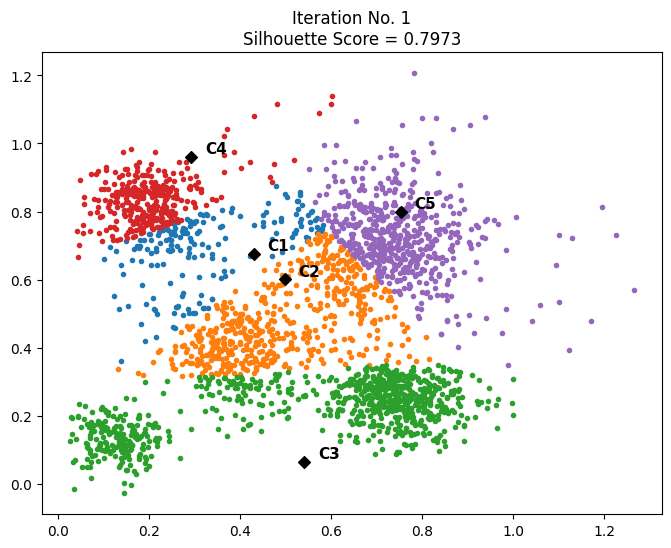

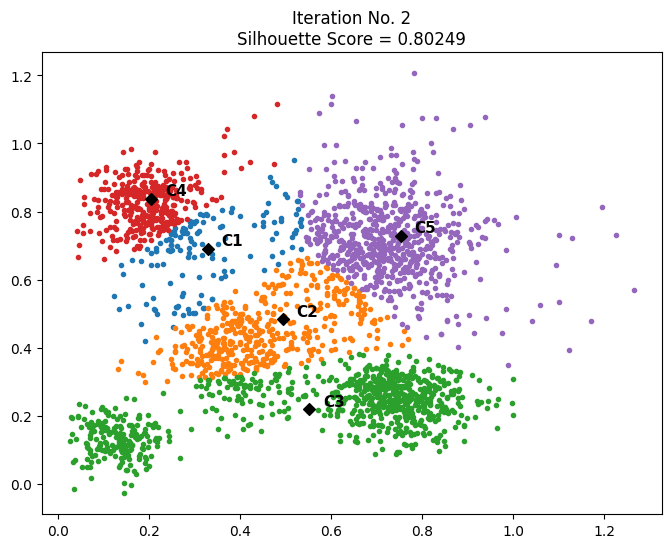

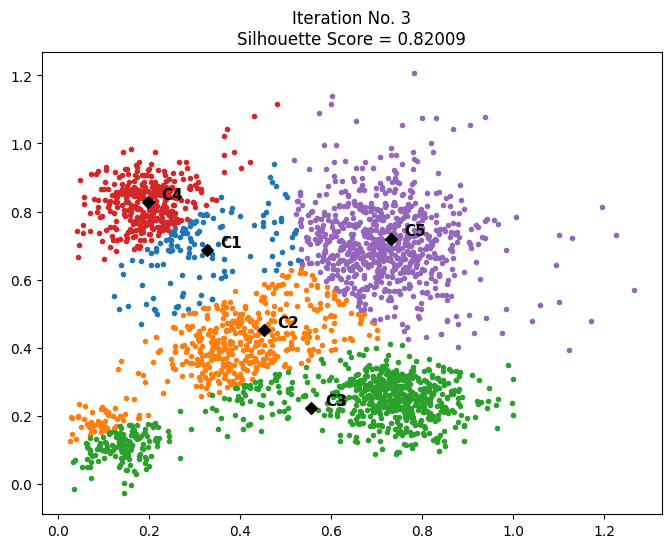

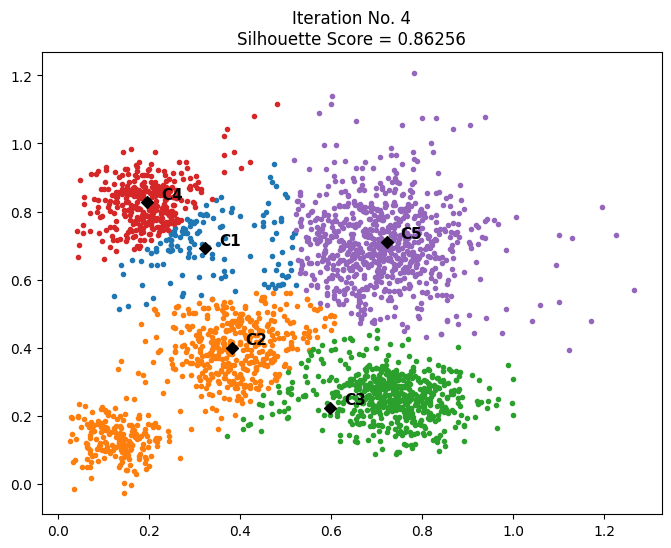

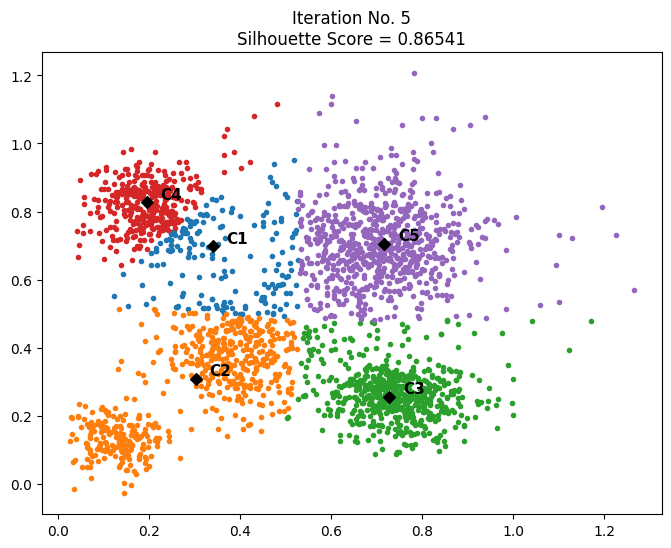

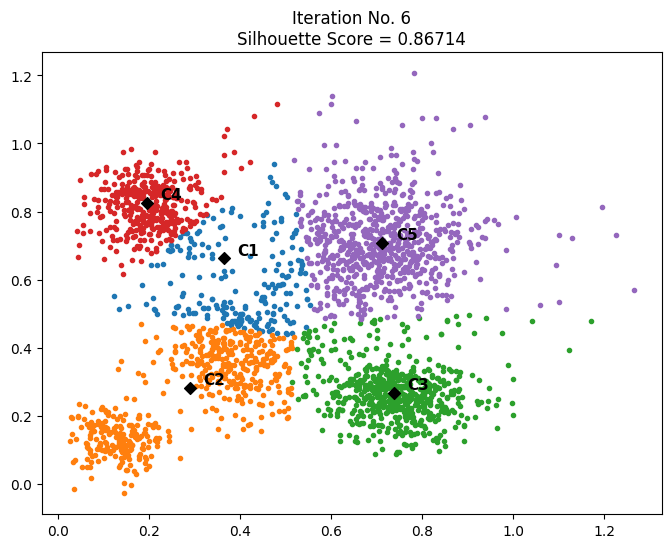

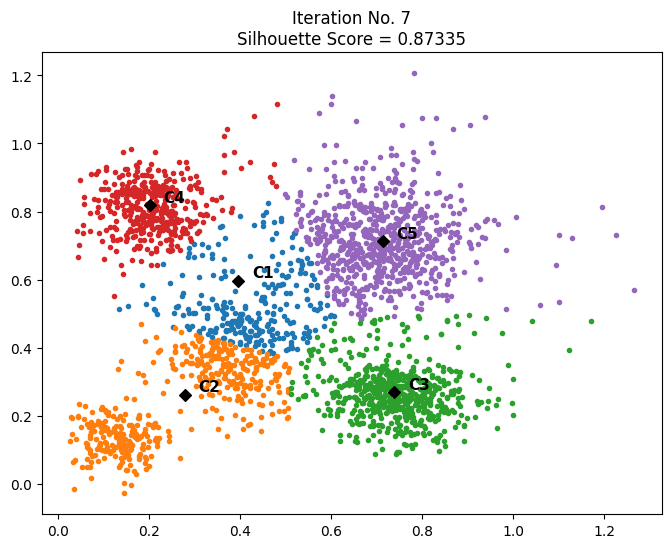

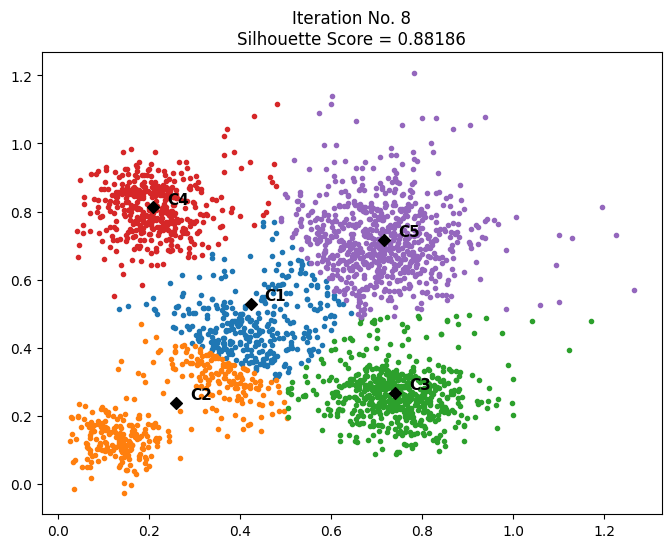

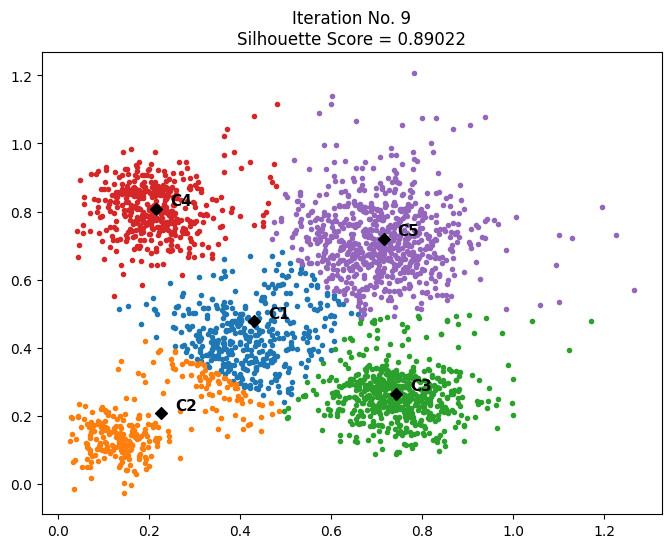

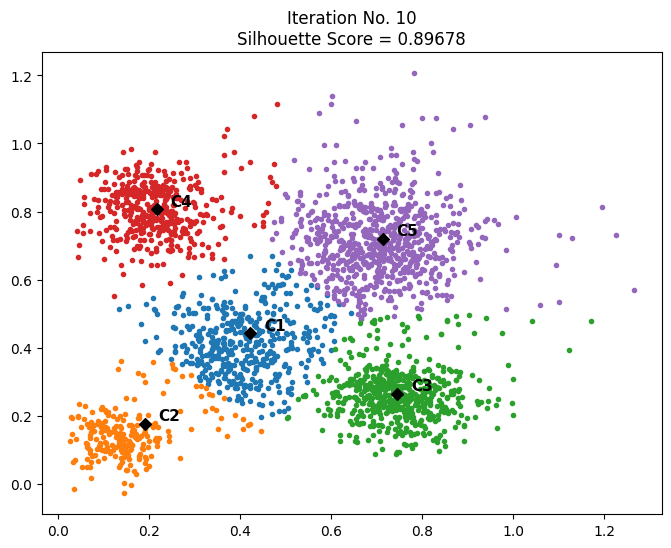

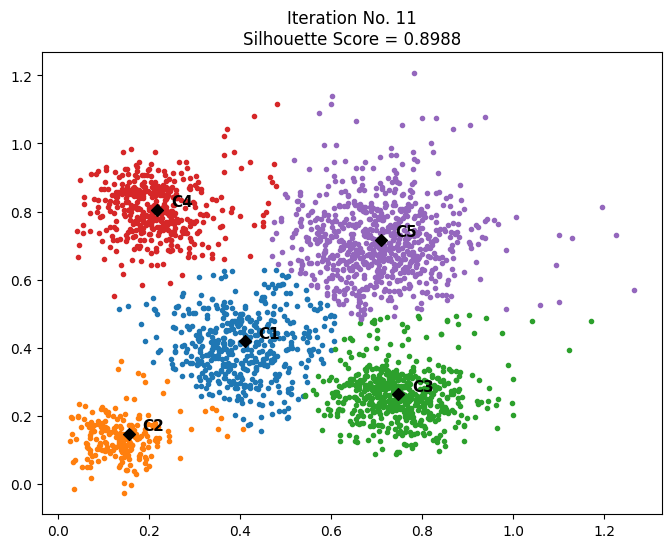

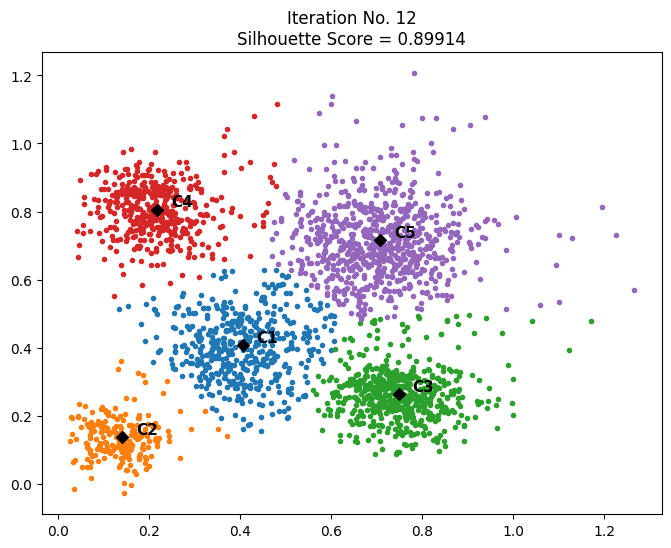

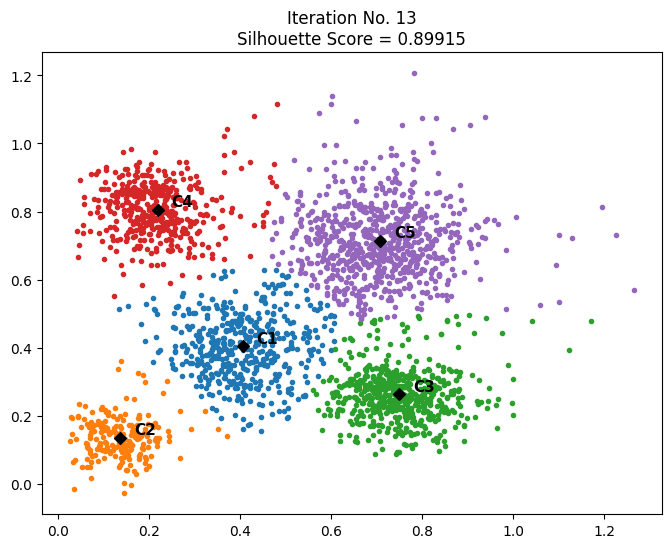

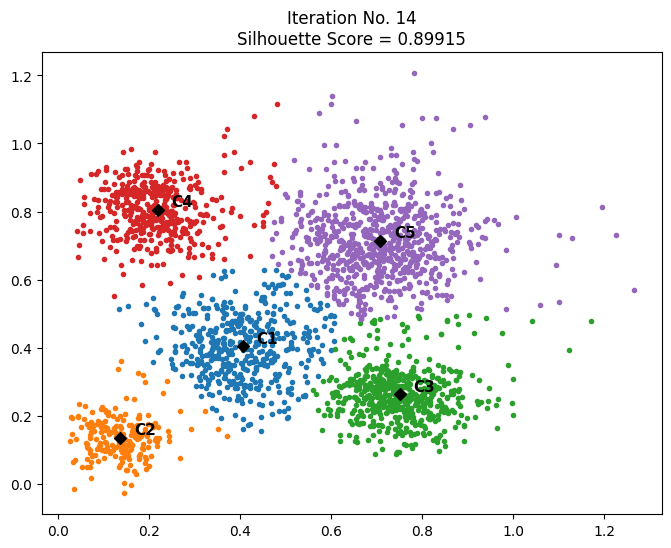

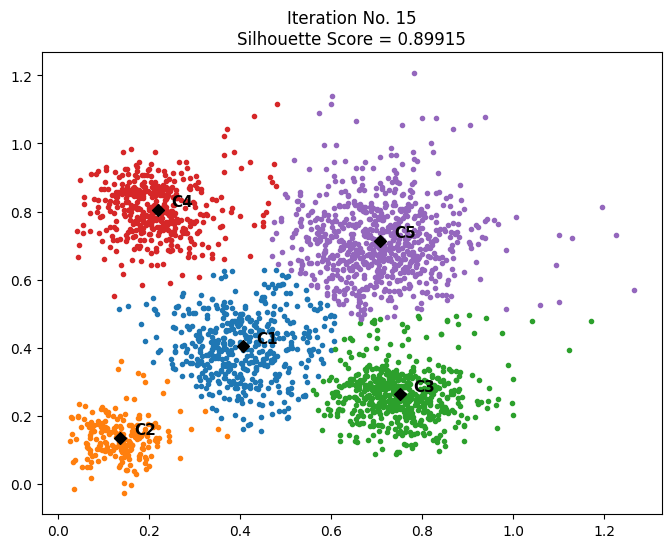

In [10]:
silhoutette_score ,centroids = kmeans(data, k=5)

# Prediction

In [9]:
pred = predict_kmeans((0.85,0.58),centroids)

Distance from c1 is 0.332
Distance from c2 is 0.840
Distance from c3 is 0.195
Distance from c4 is 0.477
Distance from c5 is 0.670
--------------------
Best centroid seems to be c3 (0.709, 0.715) 

Prportional distances
Distance from c1 = 1.701
Distance from c2 = 4.299
Distance from c3 = 1.000
Distance from c4 = 2.442
Distance from c5 = 3.429
